**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [39]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [3]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [4]:
# write you answer here

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [5]:
# write your answer here

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [6]:
# write your answer here

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [7]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [36]:
# begin by setting the seed and drawing from random normal
np.random.seed(1984)
eps = np.random.normal(0,par.sigma,par.K)

# Simulate and calculate expected utility and average realized utility
expected_utility = np.zeros(par.J)
realized_utility = np.zeros(par.J)

for j in range(par.J):
    eps = np.random.normal(0, par.sigma, par.K)
    u_kij = par.v[j] + eps
    expected_utility[j] = np.mean(u_kij)
    realized_utility[j] = np.mean(u_kij)

# Display the results
for j in range(par.J):
    print(f"Career track {j+1}:")
    print(f"  Analytical expected utility: {par.v[j]:.4f}")
    print(f"  Simulated Expected Utility: {expected_utility[j]:.4f}")
    print(f"  Simulated Average Realised Utility: {realized_utility[j]:.4f}")

Career track 1:
  Analytical expected utility: 1.0000
  Simulated Expected Utility: 0.9725
  Simulated Average Realised Utility: 0.9725
Career track 2:
  Analytical expected utility: 2.0000
  Simulated Expected Utility: 2.0109
  Simulated Average Realised Utility: 2.0109
Career track 3:
  Analytical expected utility: 3.0000
  Simulated Expected Utility: 3.0358
  Simulated Average Realised Utility: 3.0358


It's worth noticing that the simulated expected and realized utility for each career path are same, and are close to their respective $ v_{j} $. This makes sense at this is close to the mean $ E[u_{i,j}]$ (called 'Analytic expected utility' above), and the discrepency is due to there being a finite number of draws $K=1000$. Moreover, the simulated expected utility and simulated average realised utility are the same because the calculations are made based on the same draws from the normal distribution (with the same seed). 

To visualize the utility from each career path, we also provide a density plot of the distribution of utilities below. 


/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


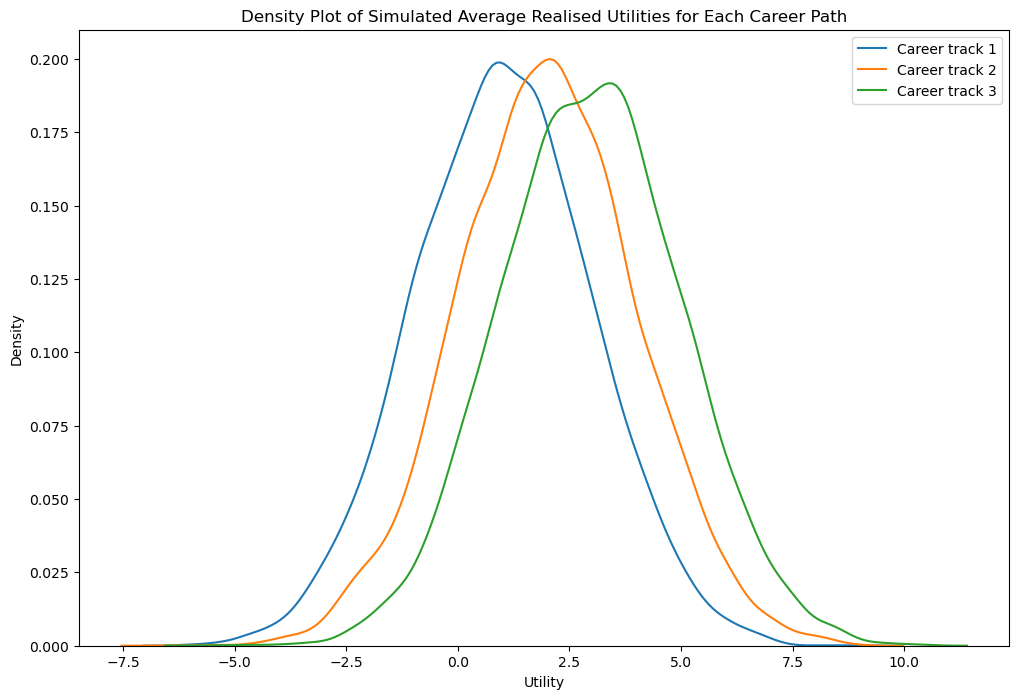

In [33]:
# Plot density plots for each career path
# Simulate utilities
utilities = []

for j in range(par.J):
    eps = np.random.normal(0, par.sigma, par.K)
    u_kij = par.v[j] + eps
    utilities.append(u_kij)

# Plot density plots for each career path
plt.figure(figsize=(12, 8))

for j in range(par.J):
    sns.kdeplot(utilities[j], label=f'Career track {j+1}')

plt.title('Density Plot of Simulated Average Realised Utilities for Each Career Path')
plt.xlabel('Utility')
plt.ylabel('Density')
plt.legend()
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

|   Graduate |   Share in |   Share in |   Share in |   Avg Subj |   Avg Real |
|            |   Career 1 |   Career 2 |   Career 3 |       Util |       Util |
|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|
|          1 |      0.146 |      0.304 |      0.55  |      3.893 |      2.39  |
|          2 |      0.1   |      0.271 |      0.63  |      3.492 |      2.505 |
|          3 |      0.068 |      0.251 |      0.681 |      3.309 |      2.628 |
|          4 |      0.052 |      0.222 |      0.726 |      3.221 |      2.672 |
|          5 |      0.035 |      0.208 |      0.757 |      3.165 |      2.727 |
|          6 |      0.027 |      0.182 |      0.79  |      3.126 |      2.777 |
|          7 |      0.018 |      0.169 |      0.813 |      3.106 |      2.781 |
|          8 |      0.013 |      0.152 |      0.835 |      3.093 |      2.797 |
|          9 |      0.009 |      0.144 |      0.847 |      3.062 |      2.848 |
|         10 |      0.007 |      0.129 |

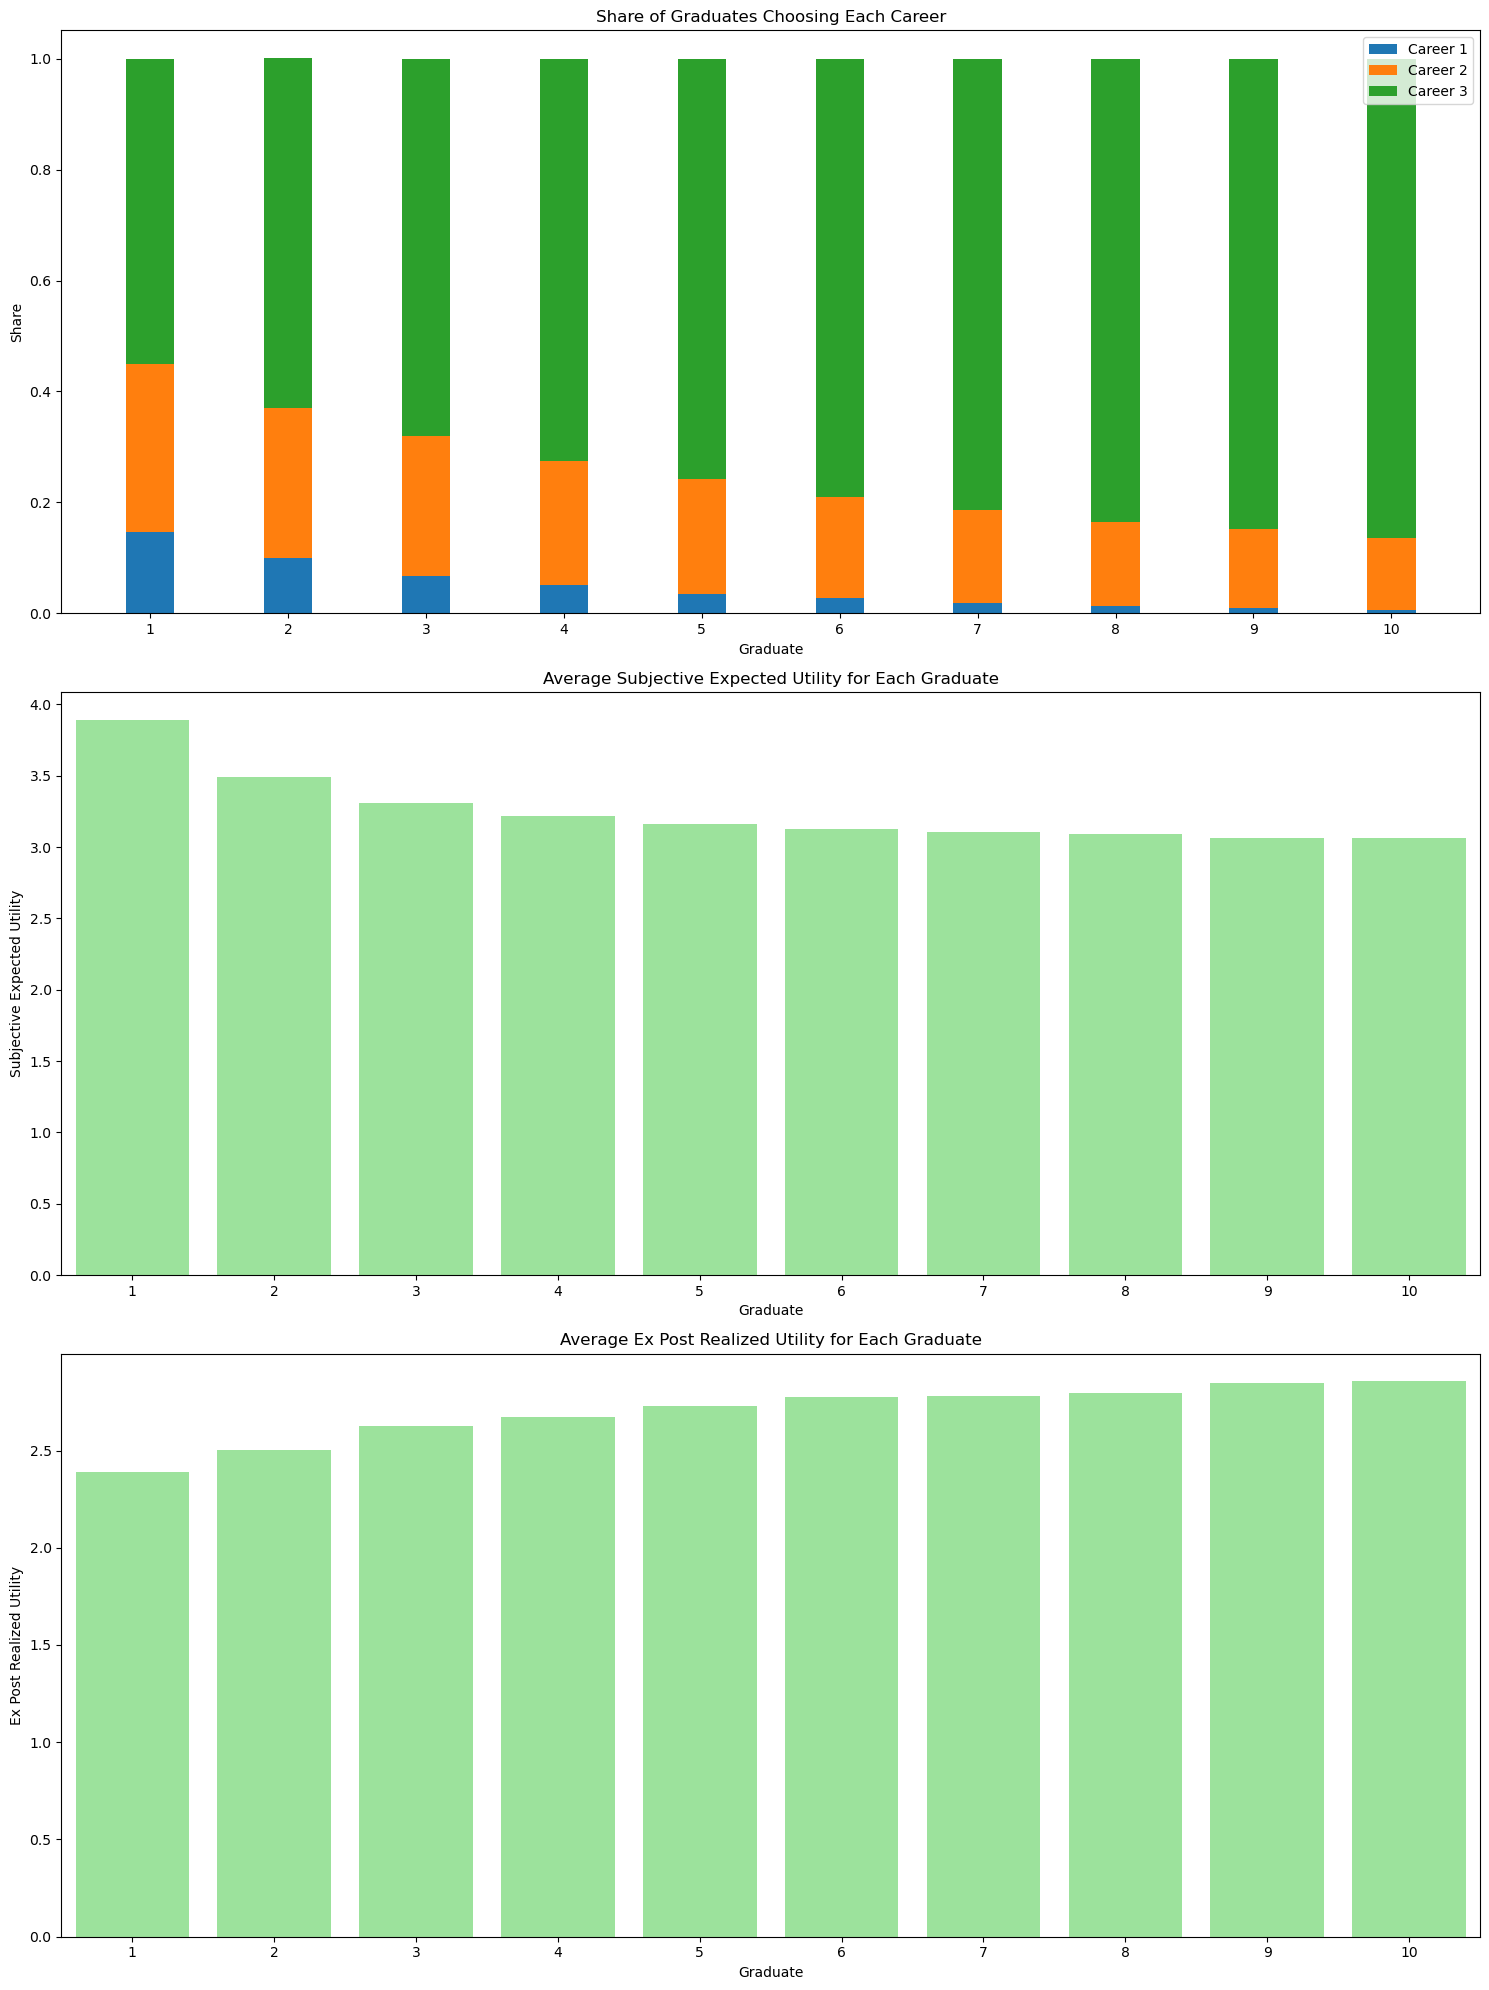

In [71]:
# Initialize arrays to store results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expectations = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate career choice based on friends' information
for i in range(par.N):
    Fi = i + 1  # Number of friends increases with each graduate
    
    for k in range(par.K):
        prior_utility = np.zeros(par.J)
        own_noise = np.random.normal(0, par.sigma, par.J)
        
        for j in range(par.J):
            friends_noise = np.random.normal(0, par.sigma, Fi)
            prior_utility[j] = par.v[j] + np.mean(friends_noise)
        
        # Choose the career track with the highest prior expected utility
        chosen_career = np.argmax(prior_utility)
        
        # Store the results
        chosen_careers[i, k] = chosen_career
        prior_expectations[i, k] = prior_utility[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise[chosen_career]

# Calculate the required statistics for each graduate
share_of_graduates_choosing_career = np.zeros((par.N, par.J))
average_subjective_expected_utility = np.zeros(par.N)
average_ex_post_realized_utility = np.zeros(par.N)

for i in range(par.N):
    for j in range(par.J):
        share_of_graduates_choosing_career[i, j] = np.mean(chosen_careers[i, :] == j)
    average_subjective_expected_utility[i] = np.mean(prior_expectations[i, :])
    average_ex_post_realized_utility[i] = np.mean(realized_utilities[i, :])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Share in\nCareer 1': share_of_graduates_choosing_career[:, 0],
    'Share in\nCareer 2': share_of_graduates_choosing_career[:, 1],
    'Share in\nCareer 3': share_of_graduates_choosing_career[:, 2],
    'Avg Subj\nUtil': average_subjective_expected_utility,
    'Avg Real\nUtil': average_ex_post_realized_utility
})

# Set 'Graduate' as the index
results_df.set_index('Graduate', inplace=True)

# Format the results to reduce decimal places
results_df = results_df.round(3)

# Display the results in a Markdown table
markdown_table = results_df.to_markdown()
print(markdown_table)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the share of graduates choosing each career as a stacked bar chart
width = 0.35
labels = np.arange(1, par.N + 1)
bars1 = results_df['Share in\nCareer 1']
bars2 = results_df['Share in\nCareer 2']
bars3 = results_df['Share in\nCareer 3']

axes[0].bar(labels, bars1, width, label='Career 1')
axes[0].bar(labels, bars2, width, bottom=bars1, label='Career 2')
axes[0].bar(labels, bars3, width, bottom=bars1 + bars2, label='Career 3')
axes[0].set_xlabel('Graduate')
axes[0].set_ylabel('Share')
axes[0].set_title('Share of Graduates Choosing Each Career')
axes[0].legend()
axes[0].set_xticks(labels)  # Ensure all graduate numbers are shown

# Plot the average subjective expected utility for each graduate (single color)
sns.barplot(ax=axes[1], x=np.arange(1, par.N + 1), y=average_subjective_expected_utility, color='lightgreen')
axes[1].set_title('Average Subjective Expected Utility for Each Graduate')
axes[1].set_xlabel('Graduate')
axes[1].set_ylabel('Subjective Expected Utility')

# Plot the average ex post realized utility for each graduate (single color)
sns.barplot(ax=axes[2], x=np.arange(1, par.N + 1), y=average_ex_post_realized_utility, color='lightgreen')
axes[2].set_title('Average Ex Post Realized Utility for Each Graduate')
axes[2].set_xlabel('Graduate')
axes[2].set_ylabel('Ex Post Realized Utility')

plt.tight_layout()
plt.show()


#### Key Findings

1. **Share of Graduates Choosing Each Career**
   - The share of graduates choosing each career is represented in the first bar chart. Each bar shows the proportion of graduates (from 1 to 10) who chose Career 1, Career 2, and Career 3.
   - As the number of friends increases, the share of graduates choosing Career 3 also increases. This suggests that with more information (from more friends), graduates are more likely to choose the career with the highest true value (Career 3).

2. **Average Subjective Expected Utility**
   - The second bar chart displays the average subjective expected utility for each graduate, which represents their expected utility based on friends' information.
   - Graduates with fewer friends (e.g., Graduate 1) tend to have higher subjective expected utility. This is because their prior information is less precise, leading to potentially higher subjective expectations.

3. **Average Ex Post Realized Utility**
   - The third bar chart shows the average ex post realized utility for each graduate after choosing their career based on the initial information.
   - The realized utility tends to increase with the number of friends. Graduates with more friends have better information, leading to more accurate career choices and higher realized utility.


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

|   Graduate |   Avg Subj |   Avg Real |   Switch Share |   Switch Share |   Switch Share |
|            |   Util New |   Util New |       Career 1 |       Career 2 |       Career 3 |
|-----------:|-----------:|-----------:|---------------:|---------------:|---------------:|
|          1 |      3.709 |      1.813 |          0.108 |          0.188 |          0.276 |
|          2 |      3.44  |      2.101 |          0.064 |          0.149 |          0.28  |
|          3 |      3.347 |      2.213 |          0.042 |          0.13  |          0.276 |
|          4 |      3.341 |      2.344 |          0.03  |          0.109 |          0.277 |
|          5 |      3.324 |      2.388 |          0.018 |          0.099 |          0.281 |
|          6 |      3.337 |      2.443 |          0.016 |          0.086 |          0.278 |
|          7 |      3.328 |      2.469 |          0.01  |          0.075 |          0.298 |
|          8 |      3.358 |      2.552 |          0.009 |          0.073 |      

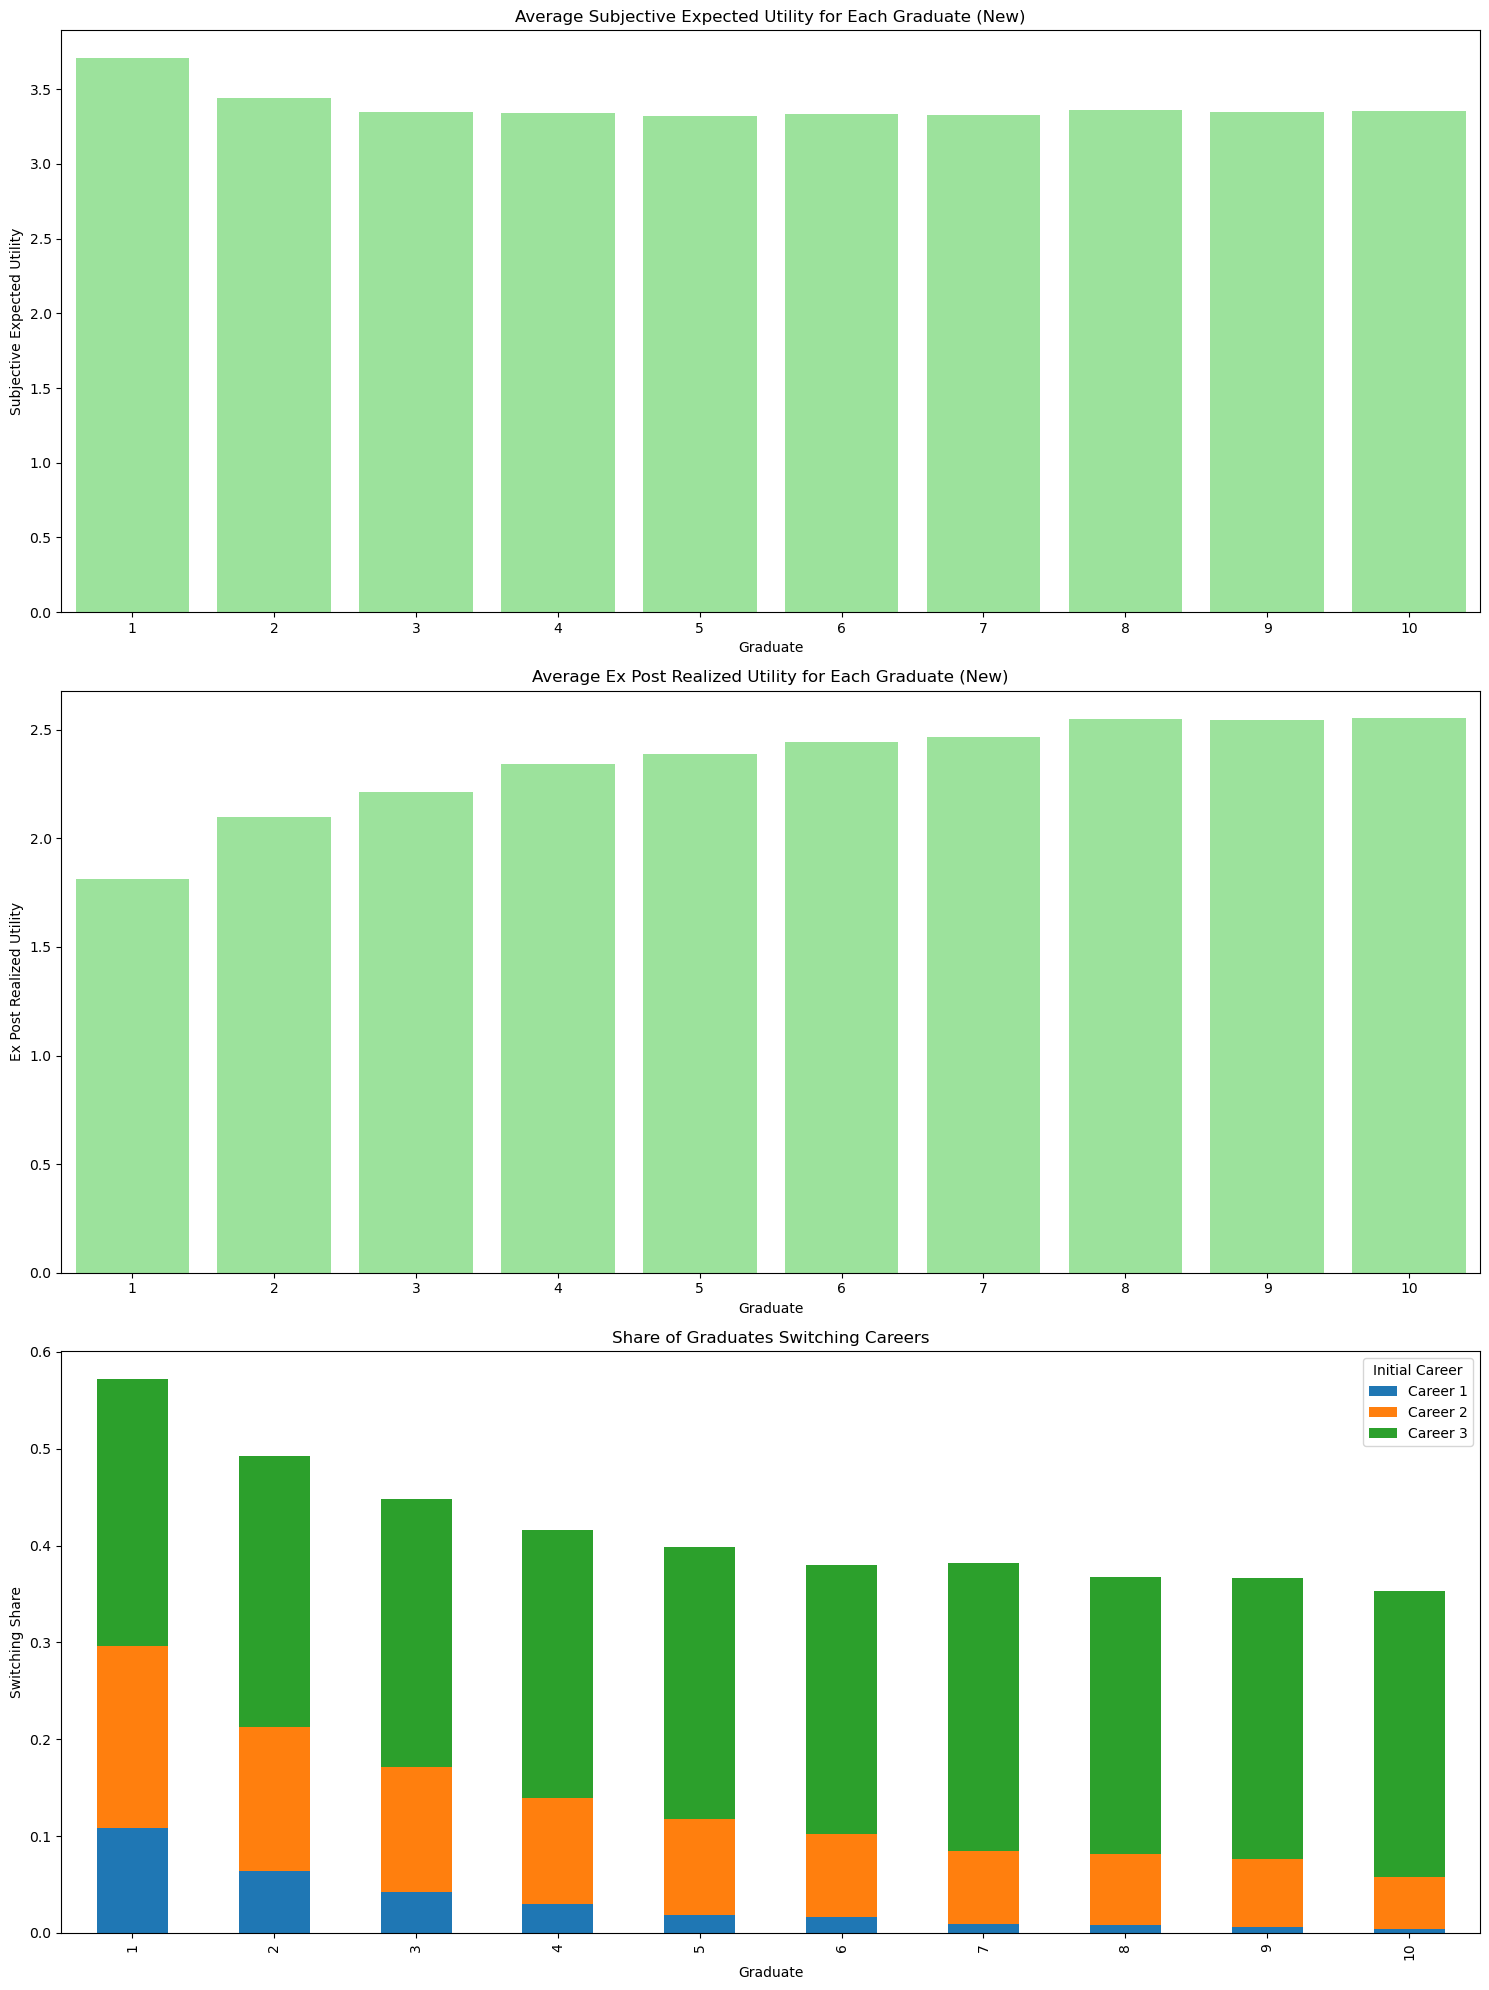

In [69]:
# Set switching cost parameter
par.c = 1  # Switching cost

# Initialize arrays to store results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expectations = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# Simulate initial career choice based on friends' information
for i in range(par.N):
    Fi = i + 1  # Number of friends increases with each graduate
    
    for k in range(par.K):
        prior_utility = np.zeros(par.J)
        own_noise = np.random.normal(0, par.sigma, par.J)
        
        for j in range(par.J):
            friends_noise = np.random.normal(0, par.sigma, Fi)
            prior_utility[j] = par.v[j] + np.mean(friends_noise)
        
        # Choose the career track with the highest prior expected utility
        chosen_career = np.argmax(prior_utility)
        
        # Store the results
        chosen_careers[i, k] = chosen_career
        prior_expectations[i, k] = prior_utility[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise[chosen_career]

# Initialize arrays for new optimal career choice
new_chosen_careers = np.zeros((par.N, par.K), dtype=int)
new_prior_expectations = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switches = np.zeros((par.N, par.K), dtype=bool)

# Calculate new optimal career choice considering switching cost
for i in range(par.N):
    for k in range(par.K):
        current_career = chosen_careers[i, k]
        current_utility = realized_utilities[i, k]
        
        # Calculate new priors with switching cost
        new_priors = np.zeros(par.J)
        new_realized = np.zeros(par.J)
        for j in range(par.J):
            if j == current_career:
                new_priors[j] = current_utility
                new_realized[j] = current_utility
            else:
                new_priors[j] = prior_expectations[i, k] - par.c
                new_realized[j] = par.v[j] + np.random.normal(0, par.sigma) - par.c
        
        # Choose the new optimal career track
        new_chosen_career = np.argmax(new_priors)
        
        # Store the results
        new_chosen_careers[i, k] = new_chosen_career
        new_prior_expectations[i, k] = new_priors[new_chosen_career]
        new_realized_utilities[i, k] = new_realized[new_chosen_career]
        switches[i, k] = (new_chosen_career != current_career)

# Calculate the required statistics for each graduate
average_subjective_expected_utility_new = np.zeros(par.N)
average_ex_post_realized_utility_new = np.zeros(par.N)
switching_shares = np.zeros((par.N, par.J))

for i in range(par.N):
    average_subjective_expected_utility_new[i] = np.mean(new_prior_expectations[i, :])
    average_ex_post_realized_utility_new[i] = np.mean(new_realized_utilities[i, :])
    for j in range(par.J):
        switching_shares[i, j] = np.mean(switches[i, :] & (chosen_careers[i, :] == j))

# Convert results to DataFrame for better visualization
results_new_df = pd.DataFrame({
    'Graduate': np.arange(1, par.N + 1),
    'Avg Subj\nUtil New': average_subjective_expected_utility_new,
    'Avg Real\nUtil New': average_ex_post_realized_utility_new,
    'Switch Share\nCareer 1': switching_shares[:, 0],
    'Switch Share\nCareer 2': switching_shares[:, 1],
    'Switch Share\nCareer 3': switching_shares[:, 2]
})

# Set 'Graduate' as the index
results_new_df.set_index('Graduate', inplace=True)

# Format the results to reduce decimal places
results_new_df = results_new_df.round(3)

# Display the results in a Markdown table with wrapped labels
markdown_table_new = results_new_df.to_markdown()
print(markdown_table_new)

# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the average subjective expected utility for each graduate (single color)
sns.barplot(ax=axes[0], x=np.arange(1, par.N + 1), y=average_subjective_expected_utility_new, color='lightgreen')
axes[0].set_title('Average Subjective Expected Utility for Each Graduate (New)')
axes[0].set_xlabel('Graduate')
axes[0].set_ylabel('Subjective Expected Utility')

# Plot the average ex post realized utility for each graduate (single color)
sns.barplot(ax=axes[1], x=np.arange(1, par.N + 1), y=average_ex_post_realized_utility_new, color='lightgreen')
axes[1].set_title('Average Ex Post Realized Utility for Each Graduate (New)')
axes[1].set_xlabel('Graduate')
axes[1].set_ylabel('Ex Post Realized Utility')

# Plot the share of graduates switching careers from each initial choice
switching_shares_df = pd.DataFrame(switching_shares, columns=['Career 1', 'Career 2', 'Career 3'], index=np.arange(1, par.N + 1))
switching_shares_df.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Share of Graduates Switching Careers')
axes[2].set_xlabel('Graduate')
axes[2].set_ylabel('Switching Share')
axes[2].legend(title='Initial Career')

plt.tight_layout()
plt.show()


#### Key Findings

1. **Average Subjective Expected Utility (New)**
   - The first bar chart shows the average subjective expected utility for each graduate after potentially switching careers. 
   - Graduates with fewer friends (e.g. Graduate 1) tend to have higher subjective expected utility compared to those with more friends. This can be attributed to the fact that the fewer friends a graduate has, the less precise their initial information is, leading to potentially higher revisions in their expectations after learning their true utility.

2. **Average Ex Post Realized Utility (New)**
   - The second bar chart displays the average ex post realized utility for each graduate after potentially switching careers.
   - The realized utility tends to be lower for graduates with fewer friends initially. This suggests that while these graduates adjust their career choice based on the true utility they learn, the switching cost impacts their final realized utility.

3. **Share of Graduates Switching Careers (New)**
   - The third bar chart, a stacked bar chart, indicates the share of graduates who switch careers after the first year, conditional on their initial career choice.
   - Graduates with fewer friends (e.g., Graduate 1) show a higher proportion of switching careers compared to those with more friends. This indicates that graduates with less precise initial information are more likely to switch careers after learning their true utility.
   - The switching shares are also displayed by the initial career choice, with green, orange, and blue segments representing switching from Career 3, Career 2, and Career 1 respectively.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [11]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [12]:
# write your answer here

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [13]:
# write your answer here

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [14]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [15]:
# write your answer here

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [16]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [17]:
# write your answer here